Python Environment: Python, pandas and matplotlib 

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

Importing Datasets

In [80]:
walmart_df = pd.read_csv('task_walmart_sales_data.csv')

global_df = pd.read_csv('task_global_temperature_data.csv')

Exploring Dataframes

In [81]:
#walmart_df.head(10)
global_df.head(10)

,Date,Global_Temperature,City,Country
0,2021-09-11,15.559781,london,uk
1,2021-06-11,36.591283,london,uk
2,2021-11-23,49.329947,tokyo,JAPAN
3,2021-02-07,-16.910704,london,UK
4,2021-07-20,25.342211,NEW YORK,USA
5,2021-07-19,23.943486,TOKYO,japan
6,2021-09-12,48.396436,london,UK
7,2021-06-28,48.848059,NEW YORK,USA
8,2021-02-04,24.934289,moscow,RUSSIA
9,2021-03-23,-10.510817,LONDON,UK


In [82]:
#walmart_df.info()
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                510 non-null    object 
 1   Global_Temperature  510 non-null    float64
 2   City                510 non-null    object 
 3   Country             510 non-null    object 
dtypes: float64(1), object(3)
memory usage: 16.1+ KB


Droping Duplicates in Walmart dataset

In [84]:
walmart_df.duplicated()
walmart_df.drop_duplicates(inplace=True)

Droping Duplicates in Global Temprature dataframes

In [85]:
global_df.duplicated()   ########## No Duplicates Found in this dataframe
global_df.drop_duplicates(inplace=True)

Checking Outliers for Sales column in Walmat_df and Global Temprature in Global_df

In [86]:
walmart_df.describe()['Sales']
#plt.boxplot(walmart_df['Sales'])
#plt.show()
#walmart_df['Sales'].hist(bins = 5, range=[0,12000])

count      995.000000
mean      5155.085427
std       3895.003014
min        106.000000
25%       2593.500000
50%       4896.000000
75%       7380.000000
max      49777.000000
Name: Sales, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1e4b36960>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1e4b359a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1e4b374d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1e4b341d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1e4b34140>],
 'means': []}

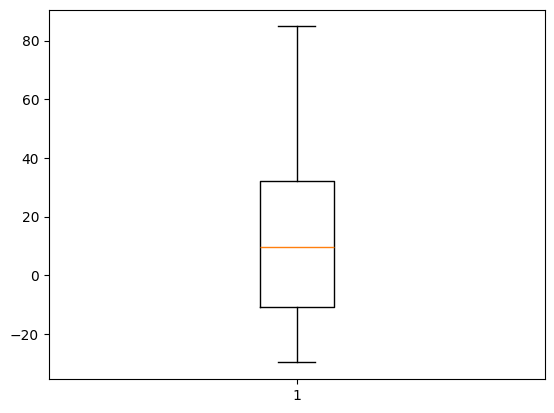

In [87]:
#global_df.describe()['Global_Temperature']
plt.boxplot(global_df['Global_Temperature'])

As Max values in both dataframes are considerably far away from the mean values, Outliers must be handled to not affect our results

In [88]:
#Capping the outliers for Sales column in walmart_df as they will be used in statistical analysis for the same column.
def capping_outliers(df, column, q1=0.05, q3=0.95):
    q1_val = df[column].quantile(q1)
    q3_val = df[column].quantile(q3)

    df[column] = df[column].clip(lower=q1_val, upper=q3_val) #setting lower values to q1 and high values to q3

    return df


walmart_df_capped=capping_outliers(walmart_df.copy(),'Sales') # copying dataframe to not affect the original for later use
walmart_df_capped.describe()

,Store,Department,Sales,Quantity
count,1000.000000,1000.00000,995.000000,1000.000000
mean,5.433000,3.06000,4993.124623,10.420000
std,2.912042,1.41223,2734.527196,5.341173
min,1.000000,1.00000,673.100000,1.000000
25%,3.000000,2.00000,2593.500000,6.000000
50%,5.000000,3.00000,4896.000000,11.000000
75%,8.000000,4.00000,7380.000000,15.000000
max,10.000000,5.00000,9450.100000,19.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1d1e4b8cdd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1e4b8d730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1e4b8cc20>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1e4b8d910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1e4b8ddf0>],
 'means': []}

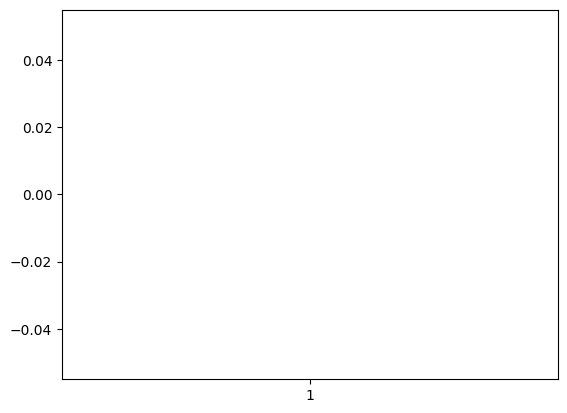

In [89]:
#box plotting Sales
plt.boxplot(walmart_df_capped['Sales'])

In [90]:
#capping the Global Tempereture in global_df

global_df_capped = capping_outliers(global_df.copy(),'Global_Temperature')
global_df_capped.describe()


,Global_Temperature
count,509.000000
mean,10.357822
std,23.423138
min,-25.593911
25%,-10.892387
50%,9.739474
75%,32.145709
max,47.239216


{'whiskers': [<matplotlib.lines.Line2D at 0x1d1e4c16ff0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1e4c175c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1e4c16d50>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1e4c17b60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1e4c17e30>],
 'means': []}

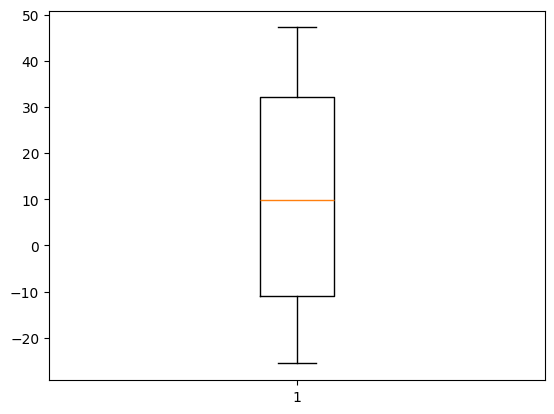

In [91]:
#check box plot for global Temp
plt.boxplot(global_df_capped['Global_Temperature'])

Inconsistent Casing

In [92]:
# Changin case for City and Country columns in global_df to lower case
global_df_capped['City'] = global_df_capped['City'].str.lower()
global_df_capped['Country'] = global_df_capped['Country'].str.lower()
global_df_capped.head(5)


Removing White spaces

In [94]:
global_df_capped['City'] = global_df_capped['City'].str.strip()
global_df_capped['Country'] = global_df_capped['Country'].str.strip()
global_df_capped

,Date,Global_Temperature,City,Country
0,2021-09-11,15.559781,london,uk
1,2021-06-11,36.591283,london,uk
2,2021-11-23,47.239216,tokyo,japan
3,2021-02-07,-16.910704,london,uk
4,2021-07-20,25.342211,new york,usa
...,...,...,...,...
505,2021-02-11,-23.444925,new york,usa
506,2021-12-23,4.565383,london,uk
507,2021-08-05,36.555323,london,uk
508,2021-01-17,47.239216,sydney,australia


Inconsistent Date Formates and Datetime objects

In [108]:
walmart_df_capped['Date']
global_df_capped['Date']

walmart_df_capped['Date'] = pd.to_datetime(walmart_df_capped['Date'])
global_df_capped['Date'] = pd.to_datetime(global_df_capped['Date'])

walmart_df_capped['Date']
global_df_capped['Date']


0     2021-09-11
1     2021-06-11
2     2021-11-23
3     2021-02-07
4     2021-07-20
         ...    
505   2021-02-11
506   2021-12-23
507   2021-08-05
508   2021-01-17
509   2021-07-20
Name: Date, Length: 509, dtype: datetime64[ns]

Sorting rows based on Dates

In [109]:
global_df_capped = global_df_capped.sort_values(by='Date')
walmart_df_capped = walmart_df_capped.sort_values(by='Date')

Extracting Data for particular store and Department

In [113]:
walmart_store_two = walmart_df_capped[walmart_df_capped['Store']==2]
walmart_department_four = walmart_df_capped[walmart_df_capped['Department']==4]

,Date,Store,Department,Sales,Quantity
648,2021-01-01,2,4,8248.0,11
263,2021-01-02,5,4,5906.0,11
968,2021-01-04,9,4,7917.0,12
964,2021-01-06,6,4,7404.0,15
828,2021-01-08,10,4,2007.0,17
...,...,...,...,...,...
540,2021-12-23,3,4,8486.0,4
745,2021-12-24,7,4,4407.0,8
180,2021-12-25,8,4,9088.0,3
251,2021-12-26,4,4,8225.0,9


In [114]:
#checking new extractions
walmart_department_four.head(10)
walmart_store_two.head(10)

,Date,Store,Department,Sales,Quantity
648,2021-01-01,2,4,8248.0,11
895,2021-01-03,2,1,7946.0,10
894,2021-01-07,2,2,2706.0,5
484,2021-01-10,2,1,7580.0,14
554,2021-01-13,2,2,6783.0,6
566,2021-01-19,2,3,5202.0,13
636,2021-01-19,2,4,3767.0,8
375,2021-01-26,2,4,5675.0,6
814,2021-02-03,2,2,673.1,18
761,2021-02-03,2,5,7452.0,12


Adding new Revenue Column

In [115]:
walmart_df_capped['Revenue'] = walmart_df_capped['Quantity'] * walmart_df_capped['Sales']

In [117]:
walmart_df_capped.head(10)

,Date,Store,Department,Sales,Quantity,Revenue
848,2021-01-01,6,3,1955.0,15,29325.0
677,2021-01-01,9,3,3796.0,10,37960.0
648,2021-01-01,2,4,8248.0,11,90728.0
755,2021-01-01,6,2,1949.0,2,3898.0
991,2021-01-01,10,3,9356.0,5,46780.0
446,2021-01-01,5,1,9315.0,17,158355.0
206,2021-01-02,3,2,3556.0,16,56896.0
263,2021-01-02,5,4,5906.0,11,64966.0
63,2021-01-02,8,2,1035.0,1,1035.0
895,2021-01-03,2,1,7946.0,10,79460.0
